In [2]:
!pip install -q yfinance

In [103]:
! pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 35.5 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19580 sha256=a933e1abb99086663d5f5482157f6f44b7623ccd5cb9708dc9d6adec0fa4f34c
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Successfully built validators
  Attempting uninstall: tzlocal
    Found existing installation: tzlocal 5.0.1
    Uninstalling tzloc

In [27]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(5)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-07-25,129.309998,129.580002,128.529999,129.130005,129.130005,39236700,AMAZON
2023-07-26,126.510002,129.080002,126.110001,128.149994,128.149994,53910100,AMAZON
2023-07-27,131.000000,132.630005,127.790001,128.250000,128.250000,52610700,AMAZON
2023-07-28,129.690002,133.009995,129.330002,132.210007,132.210007,46234700,AMAZON
2023-07-31,133.199997,133.869995,132.380005,133.679993,133.679993,41821800,AMAZON


In [4]:
# Summary Stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,158.573945,160.387849,157.022829,158.783824,158.426255,7.040936e+07
std,17.529764,17.328560,17.862373,17.611269,17.750261,2.320912e+07
min,126.010002,127.769997,124.169998,125.019997,124.656975,3.145820e+07
25%,145.815002,147.340004,144.014999,145.919998,145.470390,5.377905e+07
50%,154.789993,157.089996,153.369995,155.000000,154.602554,6.587450e+07
75%,171.034996,172.674995,170.470001,171.665001,171.424416,8.109905e+07
max,196.059998,198.229996,195.259995,196.449997,196.449997,1.647624e+08


In [8]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-08-01 to 2023-07-31
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


In [9]:
AAPL.isnull().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
company_name    0
dtype: int64

In [10]:
AAPL.duplicated().sum()

0

In [5]:
GOOG.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,105.525972,107.012610,104.361307,105.684681,105.684681,2.703342e+07
std,12.057636,12.134829,12.088619,12.108813,12.108813,1.111515e+07
min,85.510002,86.550003,83.449997,83.489998,83.489998,8.567800e+06
25%,95.759998,97.349998,94.470001,95.840000,95.840000,2.059160e+07
50%,102.879997,104.220001,101.860001,103.629997,103.629997,2.424990e+07
75%,116.880001,118.827499,116.555000,117.814999,117.814999,3.020725e+07
max,133.009995,134.070007,132.130005,133.110001,133.110001,9.779860e+07


In [12]:
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-08-01 to 2023-07-31
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


In [13]:
GOOG.isnull().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
company_name    0
dtype: int64

In [14]:
GOOG.duplicated().sum()

0

In [18]:
MSFT.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,274.094303,277.258326,271.189601,274.319004,273.287547,2.918940e+07
std,37.327321,37.444029,37.218151,37.379849,37.869470,1.091083e+07
min,217.550003,220.410004,213.429993,214.250000,212.649261,9.200800e+06
25%,243.160004,245.305000,240.264999,242.514999,241.041595,2.249105e+07
50%,261.690002,266.480011,260.290009,263.100006,261.870209,2.667810e+07
75%,304.865005,308.180008,303.354996,305.119995,304.454437,3.235000e+07
max,361.750000,366.779999,352.440002,359.489990,359.489990,8.610200e+07


In [19]:
MSFT.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-08-01 to 2023-07-31
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


In [20]:
MSFT.isnull().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
company_name    0
dtype: int64

In [21]:
MSFT.duplicated().sum()

0

In [7]:
AMZN.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,110.201634,111.852909,108.535578,110.193187,110.193187,6.621487e+07
std,16.559431,16.696296,16.552821,16.583660,16.583660,2.573365e+07
min,82.800003,83.480003,81.430000,81.820000,81.820000,2.826480e+07
25%,96.035000,97.544998,94.195000,96.259998,96.259998,5.062585e+07
50%,105.260002,106.790001,104.330002,105.660004,105.660004,5.941470e+07
75%,125.820000,127.545002,124.410000,126.349998,126.349998,7.272450e+07
max,143.910004,146.570007,142.000000,144.779999,144.779999,2.231334e+08


In [22]:
AMZN.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-08-01 to 2023-07-31
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


In [23]:
AMZN.isnull().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
company_name    0
dtype: int64

In [24]:
AMZN.duplicated().sum()

0

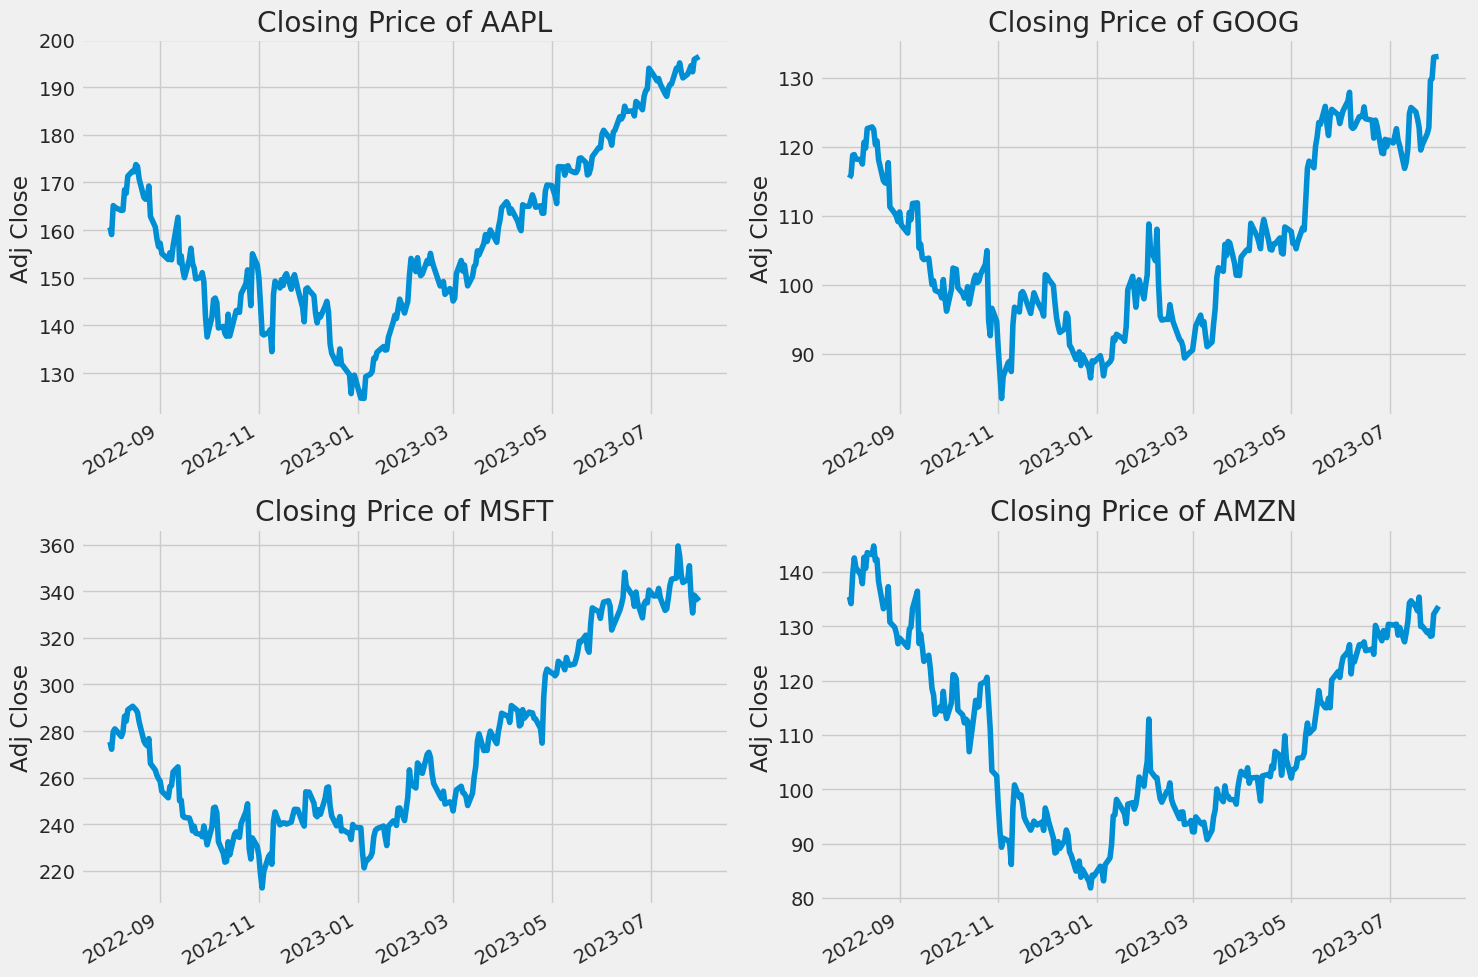

In [25]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

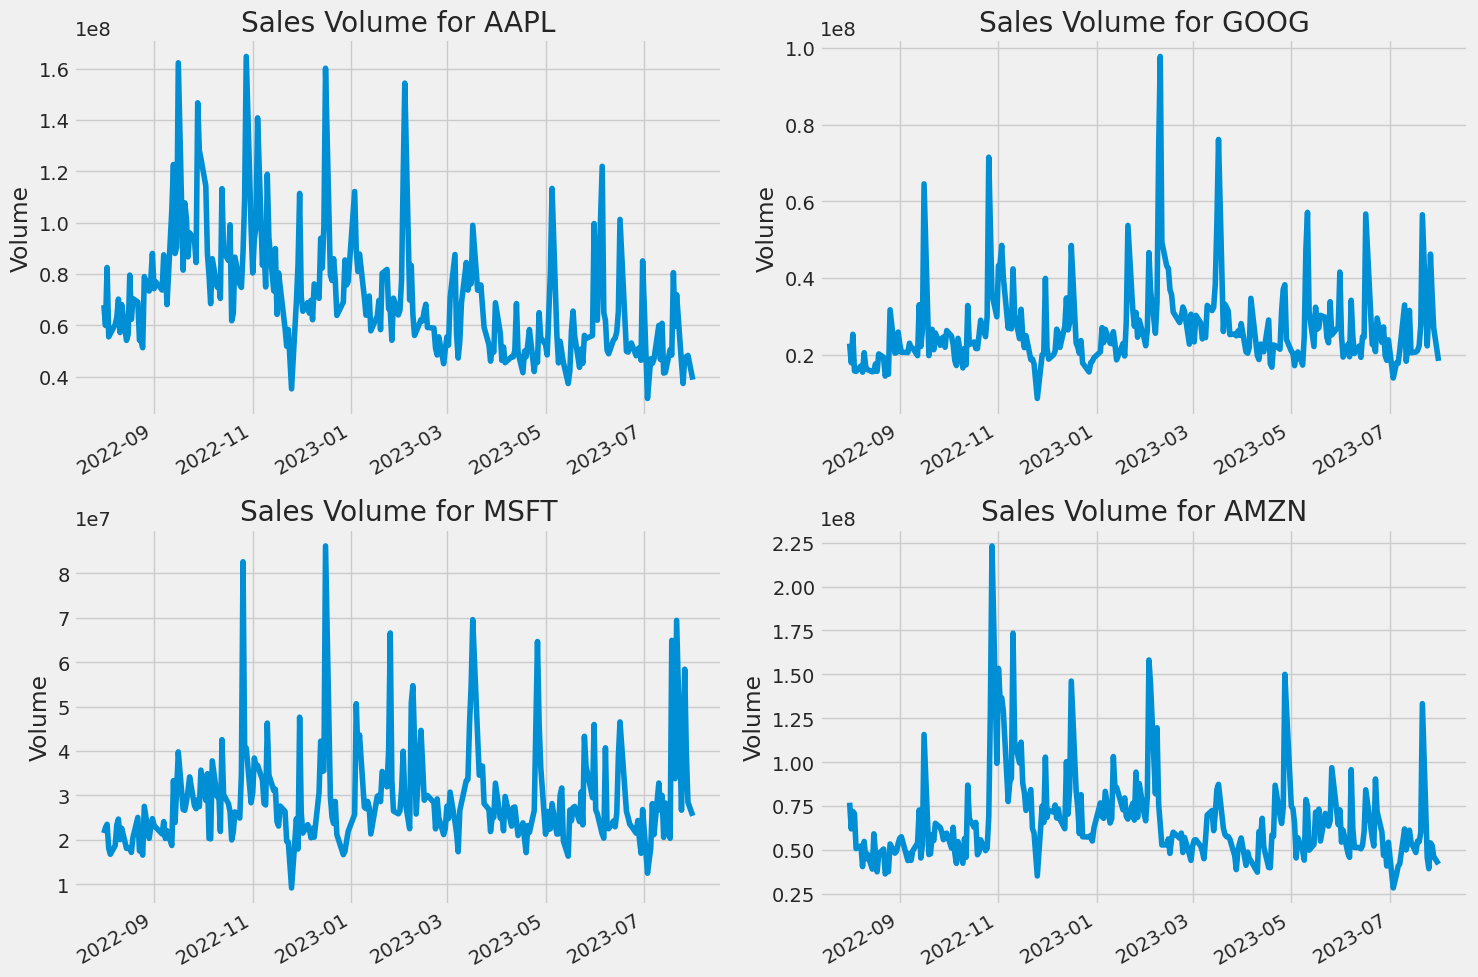

In [28]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

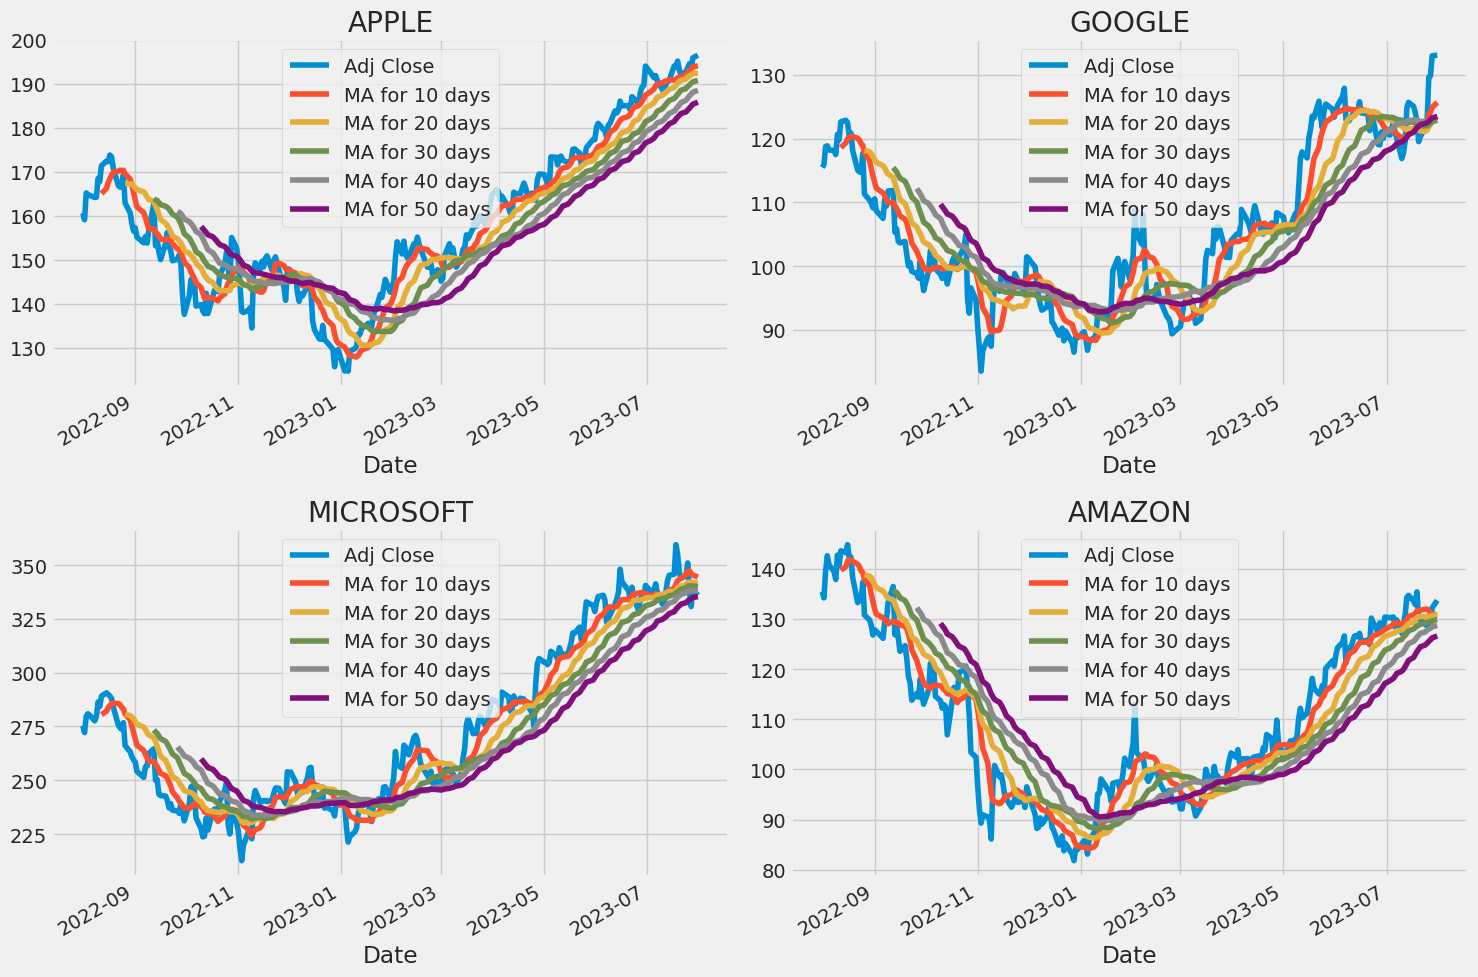

In [29]:
ma_day = [10, 20, 30, 40, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days','MA for 30 days', 'MA for 40 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 30 days', 'MA for 40 days','MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 30 days', 'MA for 40 days','MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 30 days', 'MA for 40 days','MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

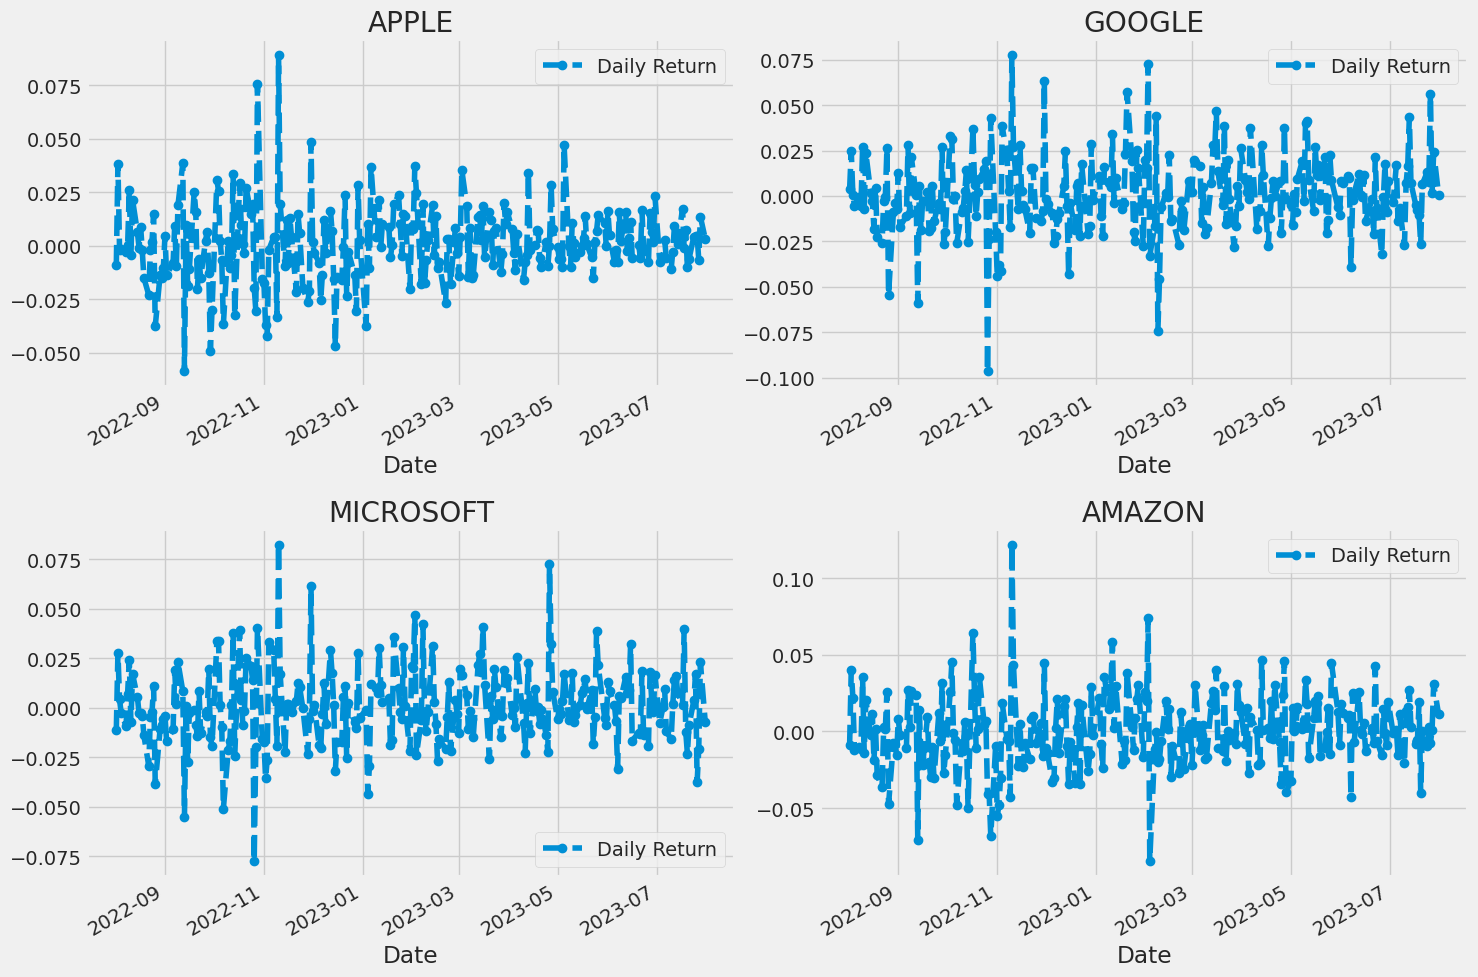

In [30]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

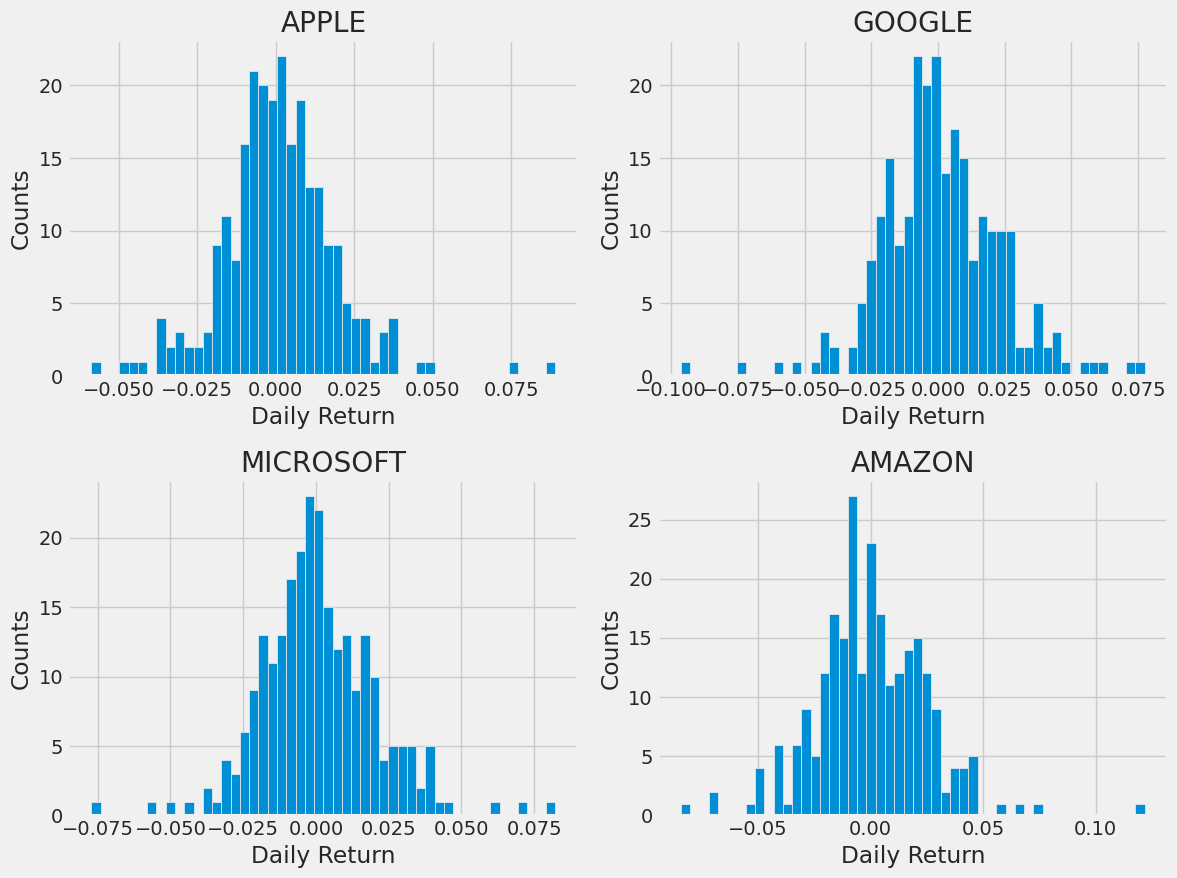

In [31]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

In [32]:
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-08-01,NaN,NaN,NaN,NaN
2022-08-02,-0.009287,-0.009085,0.003637,-0.011474
2022-08-03,0.038248,0.039952,0.024849,0.027836
2022-08-04,-0.001926,0.021861,0.000758,0.004177
2022-08-05,-0.001389,-0.012415,-0.005468,-0.002609


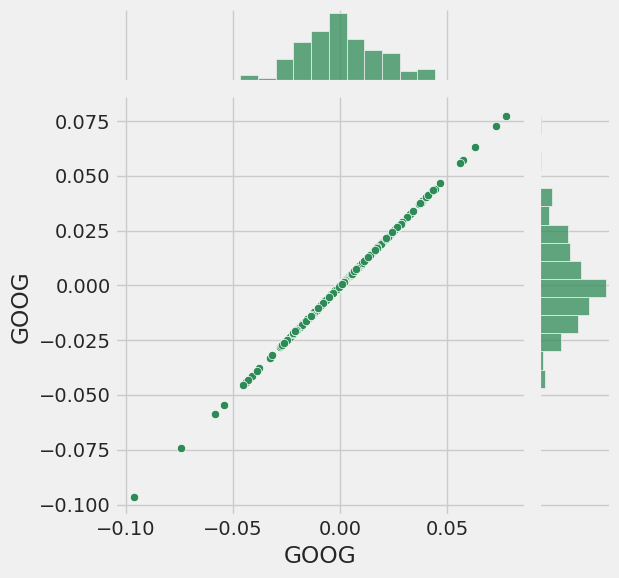

In [33]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

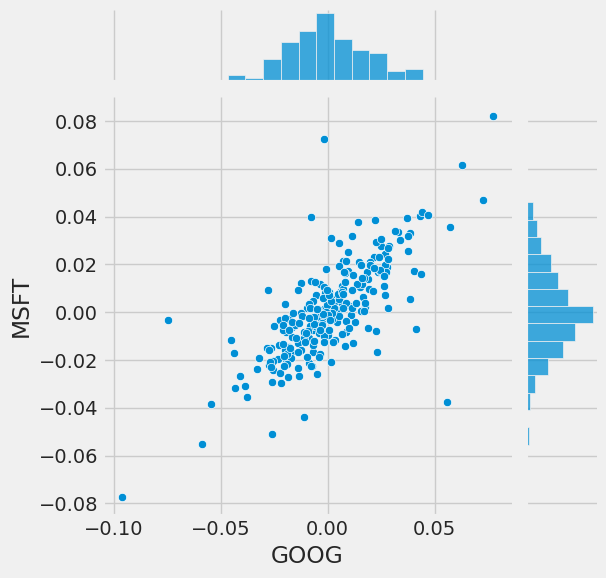

In [39]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

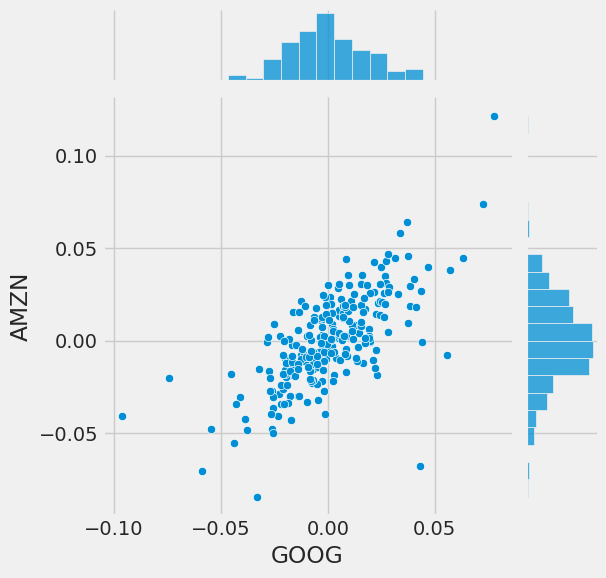

In [40]:
sns.jointplot(x='GOOG', y='AMZN', data=tech_rets, kind='scatter')

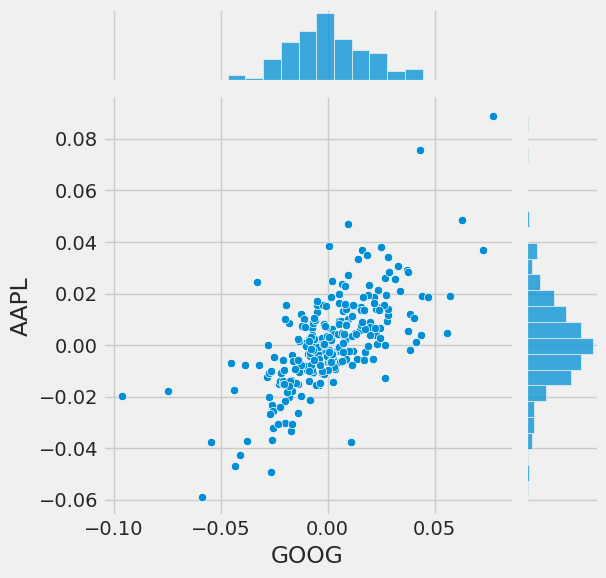

In [41]:
sns.jointplot(x='GOOG', y='AAPL', data=tech_rets, kind='scatter')

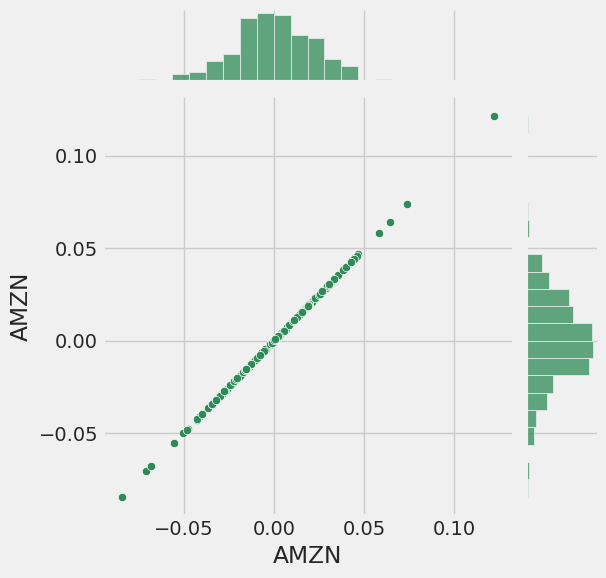

In [35]:
# Comparing Amazon to itself should show a perfectly linear relationship
sns.jointplot(x='AMZN', y='AMZN', data=tech_rets, kind='scatter', color='seagreen')

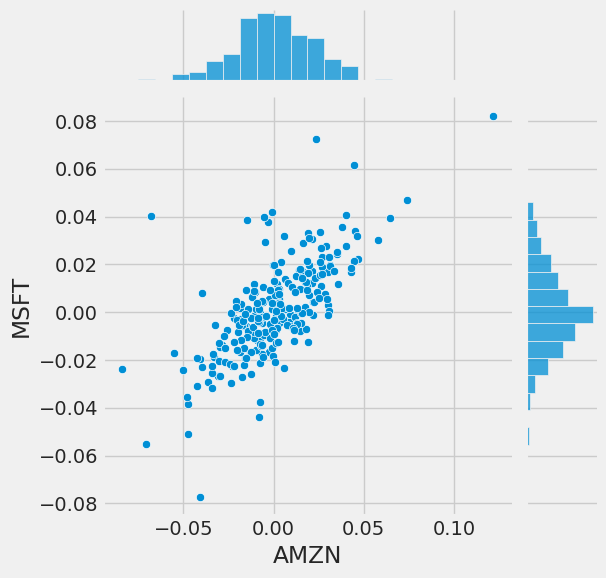

In [44]:
sns.jointplot(x='AMZN', y='MSFT', data=tech_rets, kind='scatter')

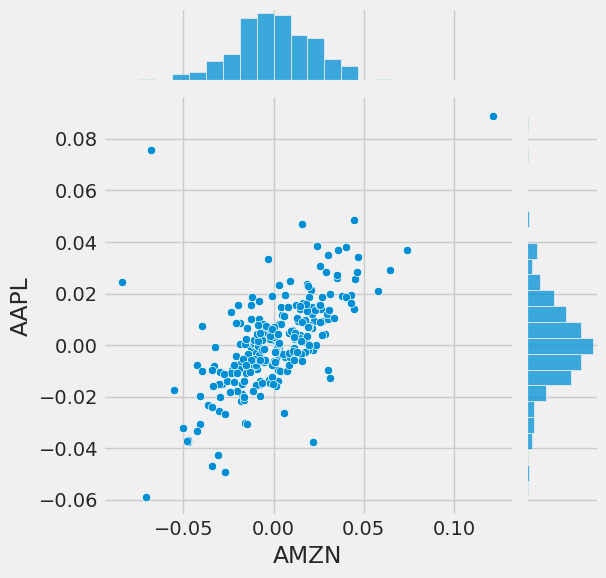

In [43]:
sns.jointplot(x='AMZN', y='AAPL', data=tech_rets, kind='scatter')

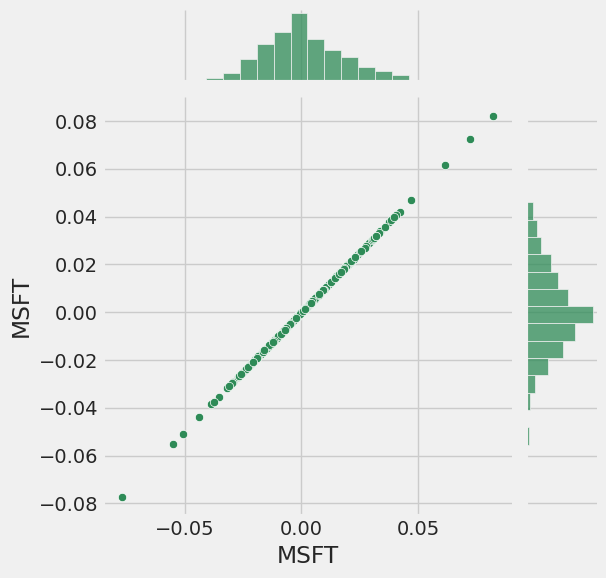

In [36]:
sns.jointplot(x='MSFT', y='MSFT', data=tech_rets, kind='scatter', color='seagreen')

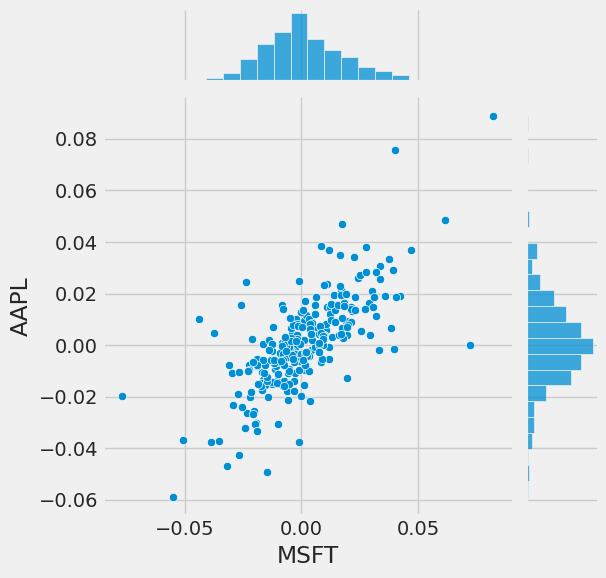

In [45]:
sns.jointplot(x='MSFT', y='AAPL', data=tech_rets, kind='scatter')

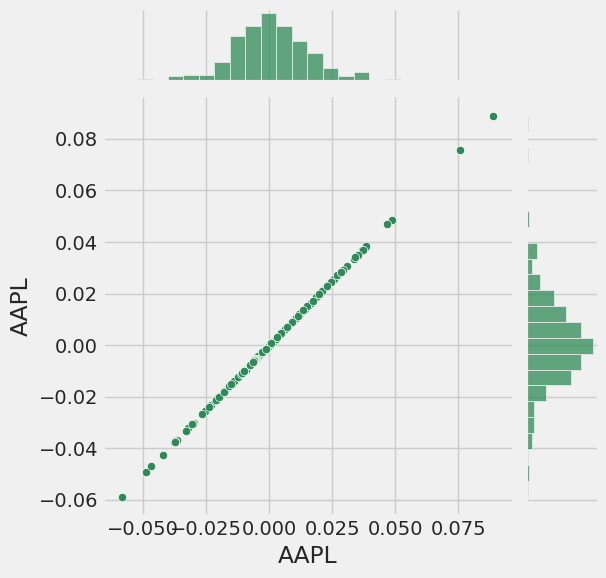

In [38]:
sns.jointplot(x='AAPL', y='AAPL', data=tech_rets, kind='scatter', color='seagreen')

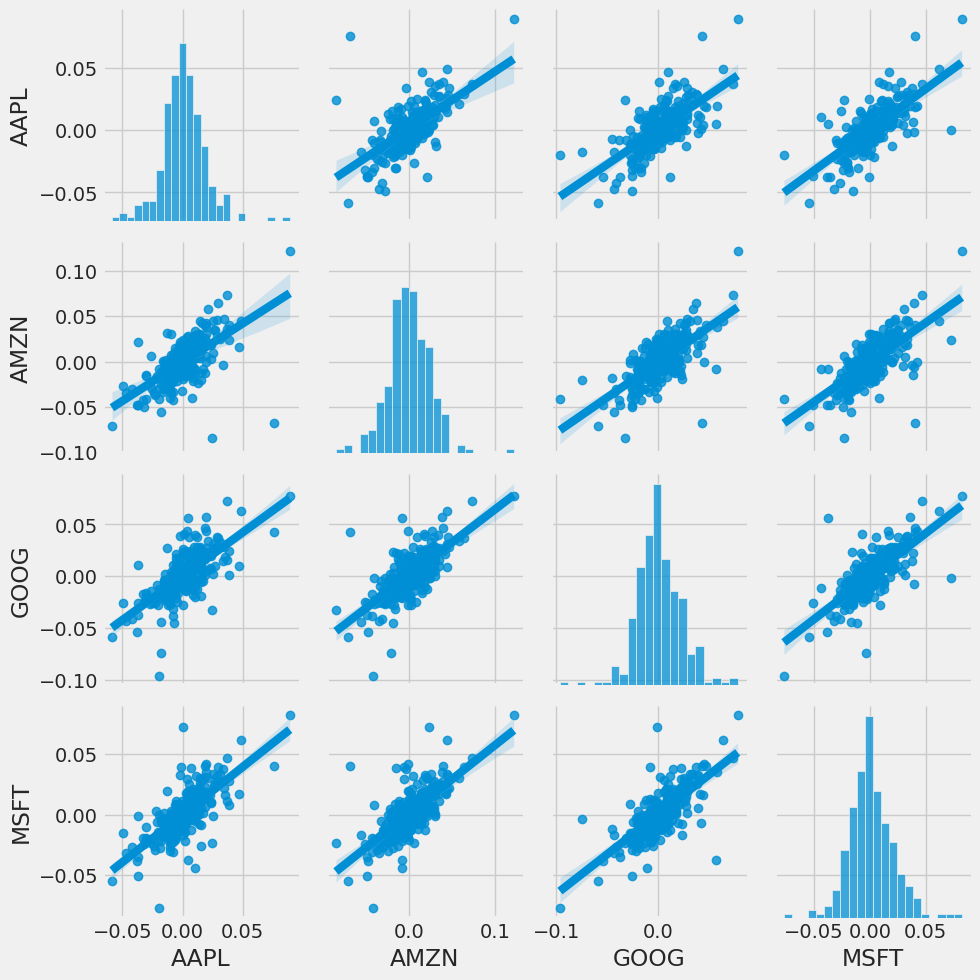

In [47]:
sns.pairplot(tech_rets, kind='reg')

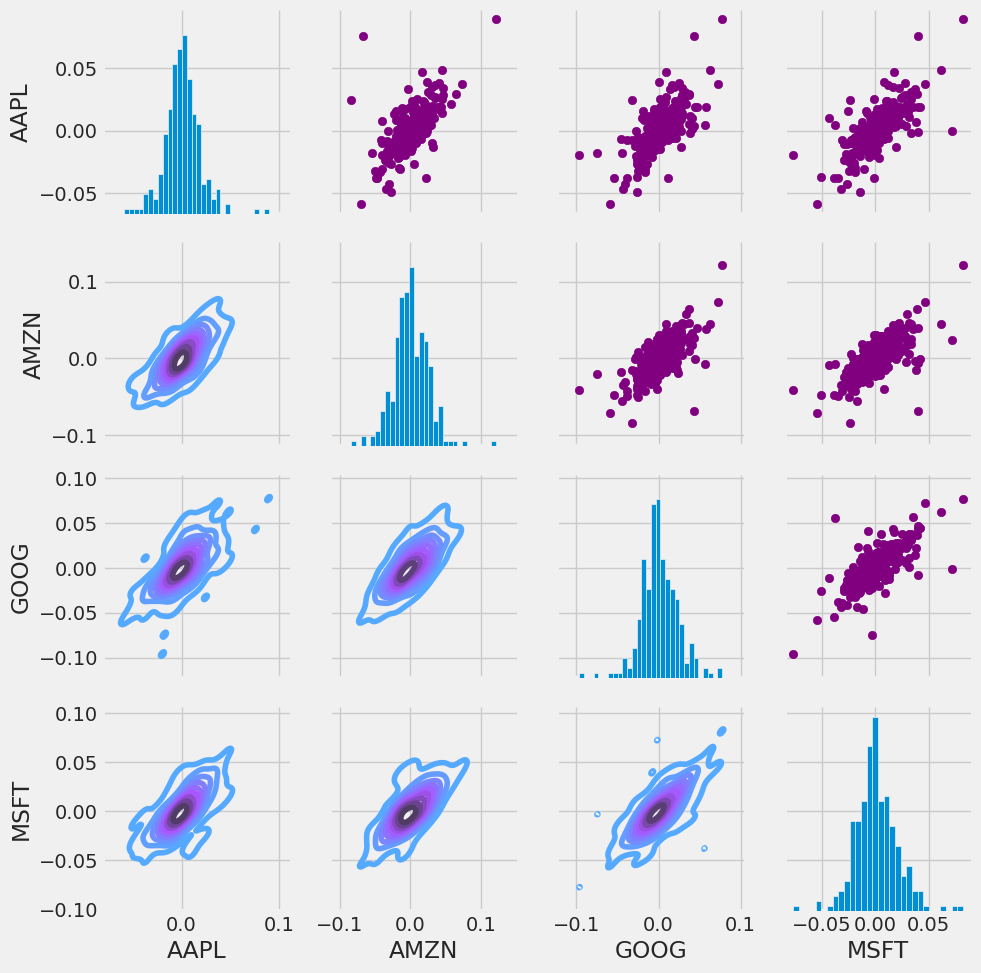

In [48]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

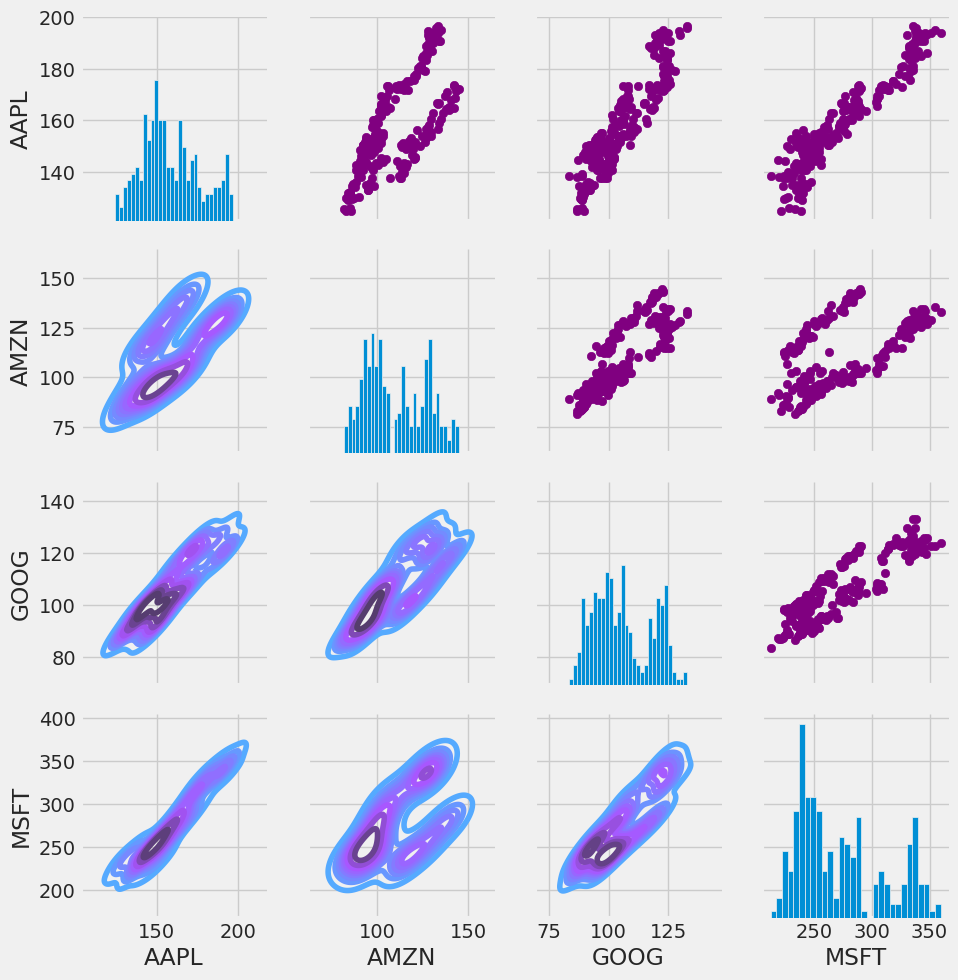

In [49]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

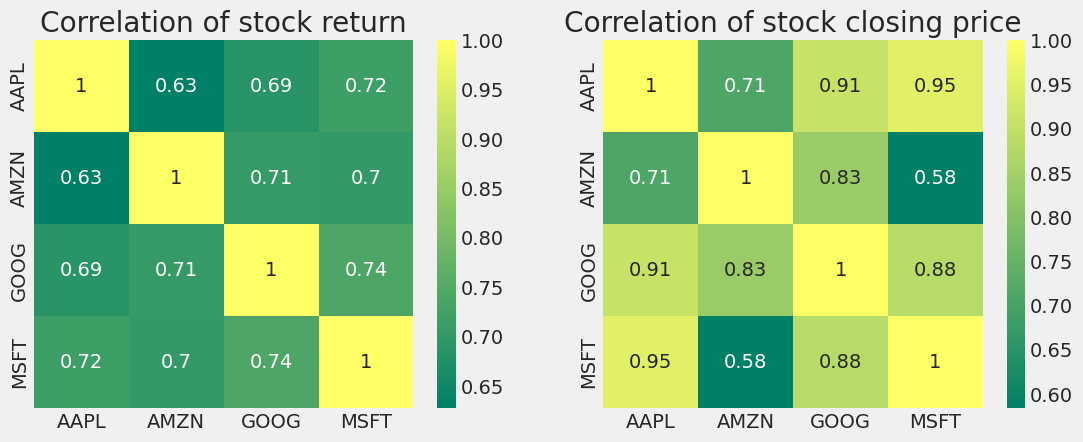

In [50]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

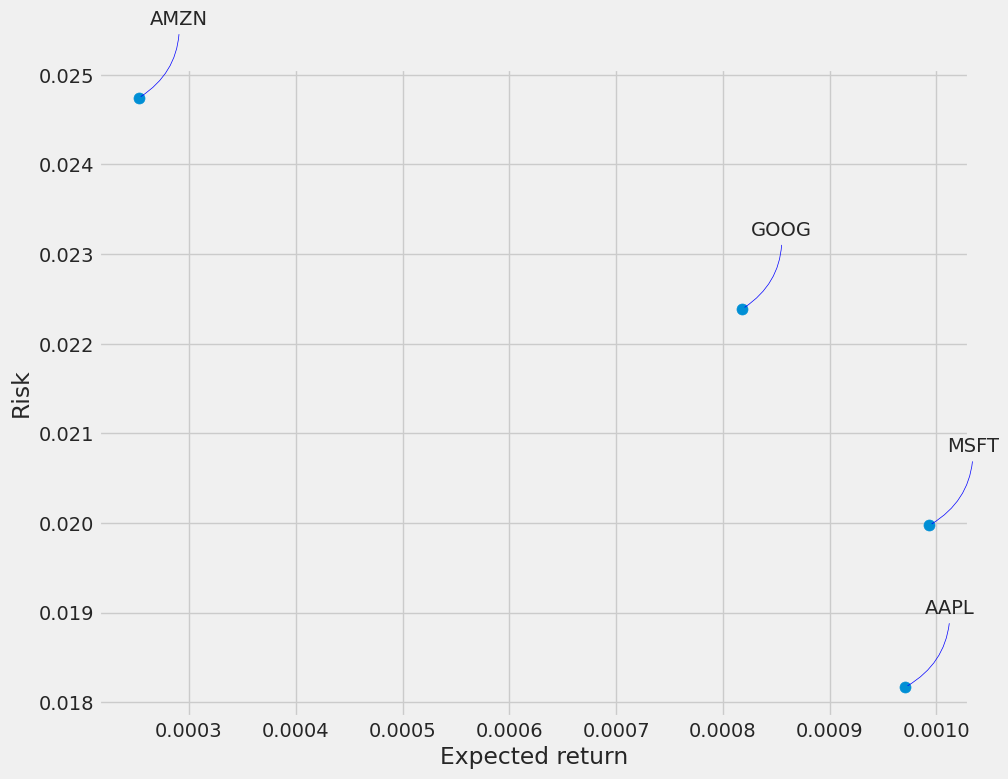

In [51]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [65]:
# Get the stock quote
AAPLdf = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
# Show teh data
AAPLdf

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.482927,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.550009,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.689342,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.821994,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.801656,394024400
...,...,...,...,...,...,...
2023-07-25,193.330002,194.440002,192.919998,193.619995,193.619995,37283200
2023-07-26,193.669998,195.639999,193.320007,194.500000,194.500000,47471900
2023-07-27,196.020004,197.199997,192.550003,193.220001,193.220001,47460200


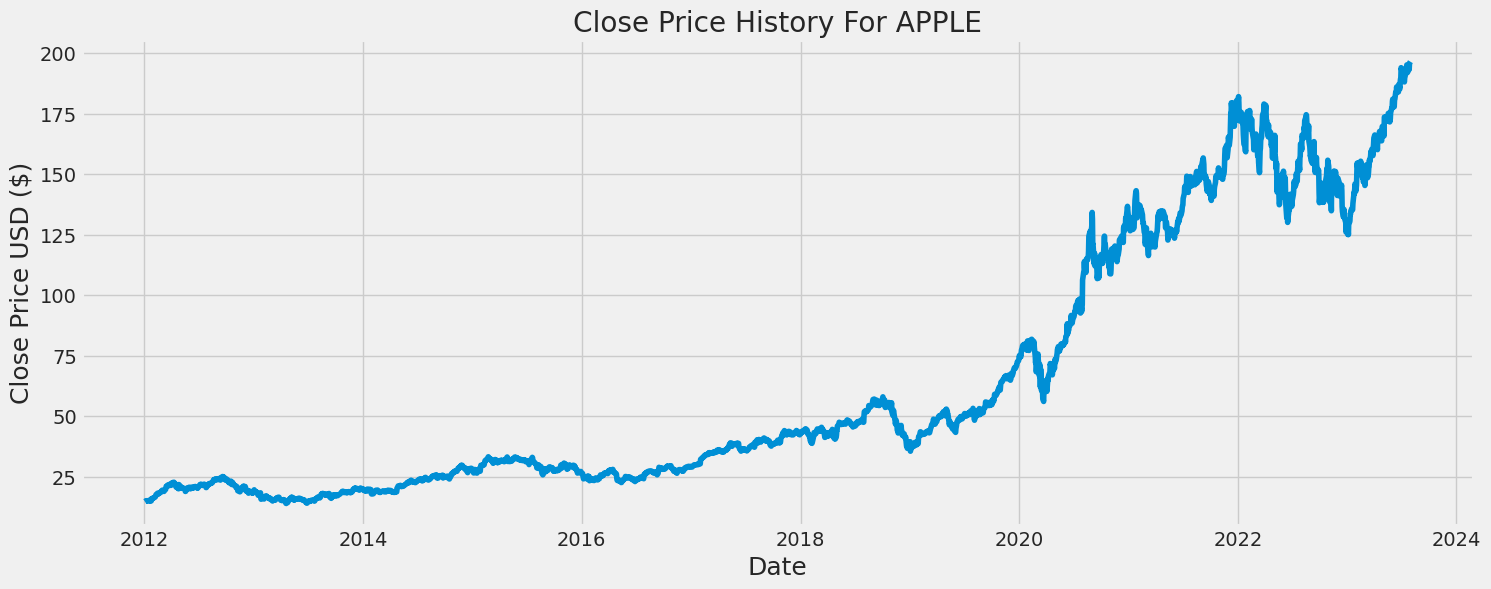

In [67]:
plt.figure(figsize=(16,6))
plt.title('Close Price History For APPLE')
plt.plot(AAPLdf['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [55]:
# Create a new dataframe with only the 'Close column
data = AAPLdf.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2767

In [56]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00405082],
       [0.0044833 ],
       [0.00538153],
       ...,
       [0.98230164],
       [0.99660281],
       [1.        ]])

In [57]:
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00405082, 0.0044833 , 0.00538153, 0.0062367 , 0.00610559,
       0.00640108, 0.00626606, 0.00603905, 0.00572986, 0.0066868 ,
       0.0075498 , 0.00728366, 0.00582575, 0.00721712, 0.00584728,
       0.01098419, 0.01058694, 0.01110552, 0.01222684, 0.01290588,
       0.01284914, 0.01263975, 0.0135321 , 0.01437162, 0.01532269,
       0.01685887, 0.02008583, 0.02013475, 0.02193121, 0.02327365,
       0.02096645, 0.02185489, 0.02183728, 0.02432844, 0.02397423,
       0.02462979, 0.02580786, 0.02646344, 0.02835186, 0.02972757,
       0.03012483, 0.03026377, 0.02791156, 0.02734404, 0.0274282 ,
       0.02963952, 0.03026182, 0.0315984 , 0.03474903, 0.0389525 ,
       0.03816582, 0.03816777, 0.04120687, 0.04215794, 0.04148084,
       0.04086246, 0.04021863, 0.04235754, 0.04382523, 0.04443971])]
[0.04292113229660477]

[array([0.00405082, 0.0044833 , 0.00538153, 0.0062367 , 0.00610559,
       0.00640108, 0.00626606, 0.00603905, 0.00572986, 0.0066868 ,
       0.0075498 , 0.00728366, 0.00

In [58]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2707/2707 [==============================] - 38s 10ms/step - loss: 0.0014


In [59]:
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 2s 19ms/step


5.257665527425041

<ipython-input-82-9ac796c0b172>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


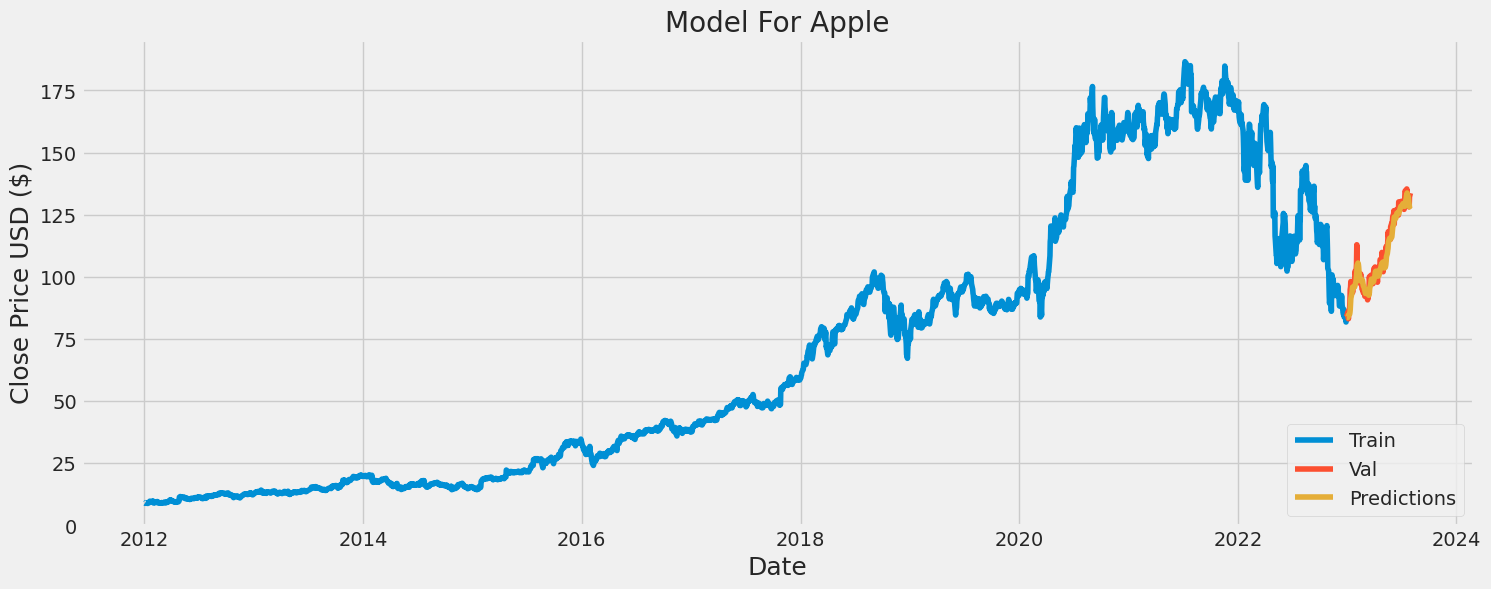

In [82]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model For Apple')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [61]:
valid

,Close,Predictions
Date,,
2022-12-30,129.929993,137.195770
2023-01-03,125.070000,136.707397
2023-01-04,126.360001,135.692001
2023-01-05,125.019997,134.847015
2023-01-06,129.619995,133.972794
...,...,...
2023-07-25,193.619995,198.173859
2023-07-26,194.500000,198.283203
2023-07-27,193.220001,198.556503


In [74]:
# Get the stock quote
AMZNdf = pdr.get_data_yahoo('AMZN', start='2012-01-01', end=datetime.now())
# Show teh data
AMZNdf

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,8.794500,8.974000,8.777500,8.951500,8.951500,102216000
2012-01-04,8.960500,9.025000,8.803500,8.875500,8.875500,84104000
2012-01-05,8.797000,8.912500,8.702500,8.880500,8.880500,76182000
2012-01-06,8.903500,9.232500,8.875000,9.130500,9.130500,140168000
2012-01-09,9.138000,9.218500,8.850000,8.928000,8.928000,101138000
...,...,...,...,...,...,...
2023-07-25,129.309998,129.580002,128.529999,129.130005,129.130005,39236700
2023-07-26,126.510002,129.080002,126.110001,128.149994,128.149994,53910100
2023-07-27,131.000000,132.630005,127.790001,128.250000,128.250000,52610700


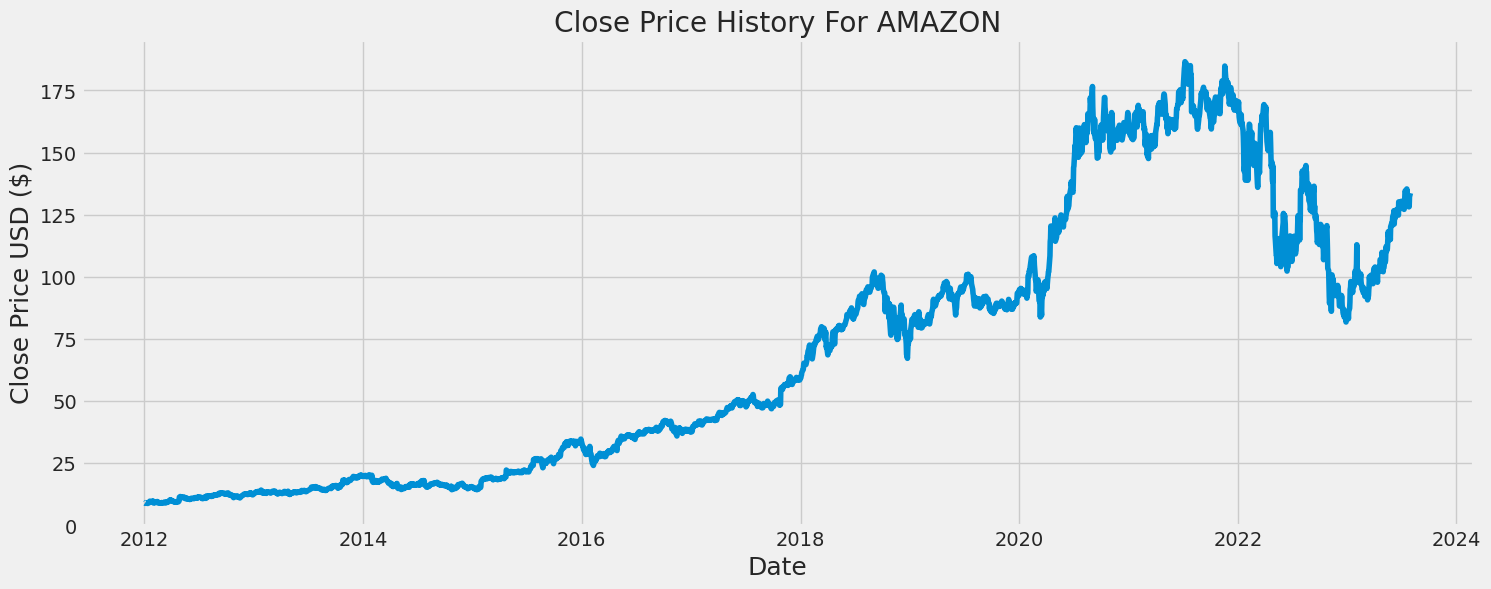

In [75]:
plt.figure(figsize=(16,6))
plt.title('Close Price History For AMAZON')
plt.plot(AMZNdf['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [76]:
# Create a new dataframe with only the 'Close column
data = AMZNdf.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2767

In [77]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[8.71892048e-04],
       [4.44381751e-04],
       [4.72507993e-04],
       ...,
       [6.71940232e-01],
       [6.94215744e-01],
       [7.02484591e-01]])

In [78]:
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00087189, 0.00044438, 0.00047251, 0.00187879, 0.0007397 ,
       0.00095908, 0.00083533, 0.        , 0.00070032, 0.0016116 ,
       0.00379977, 0.00520886, 0.00421884, 0.00285756, 0.0031135 ,
       0.00333851, 0.00489104, 0.00546762, 0.00456197, 0.00520605,
       0.00099283, 0.00162847, 0.00330476, 0.00202785, 0.00232318,
       0.00268599, 0.00254536, 0.00270287, 0.00440447, 0.0043229 ,
       0.00240193, 0.00112502, 0.00184785, 0.00178035, 0.00130784,
       0.00083252, 0.00090002, 0.00073127, 0.00221348, 0.00105752,
       0.00115596, 0.00094783, 0.00121783, 0.00145128, 0.00220505,
       0.00329351, 0.00235973, 0.00209817, 0.00243567, 0.00178035,
       0.00239068, 0.00256505, 0.00269724, 0.0046126 , 0.00444384,
       0.00463228, 0.0053748 , 0.00757704, 0.00829986, 0.00709609])]
[0.008066421706034416]

[array([0.00087189, 0.00044438, 0.00047251, 0.00187879, 0.0007397 ,
       0.00095908, 0.00083533, 0.        , 0.00070032, 0.0016116 ,
       0.00379977, 0.00520886, 0.0

In [79]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2707/2707 [==============================] - 29s 9ms/step - loss: 0.0017


In [80]:
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 6ms/step


3.0339894475922744

<ipython-input-83-4e5203657e28>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


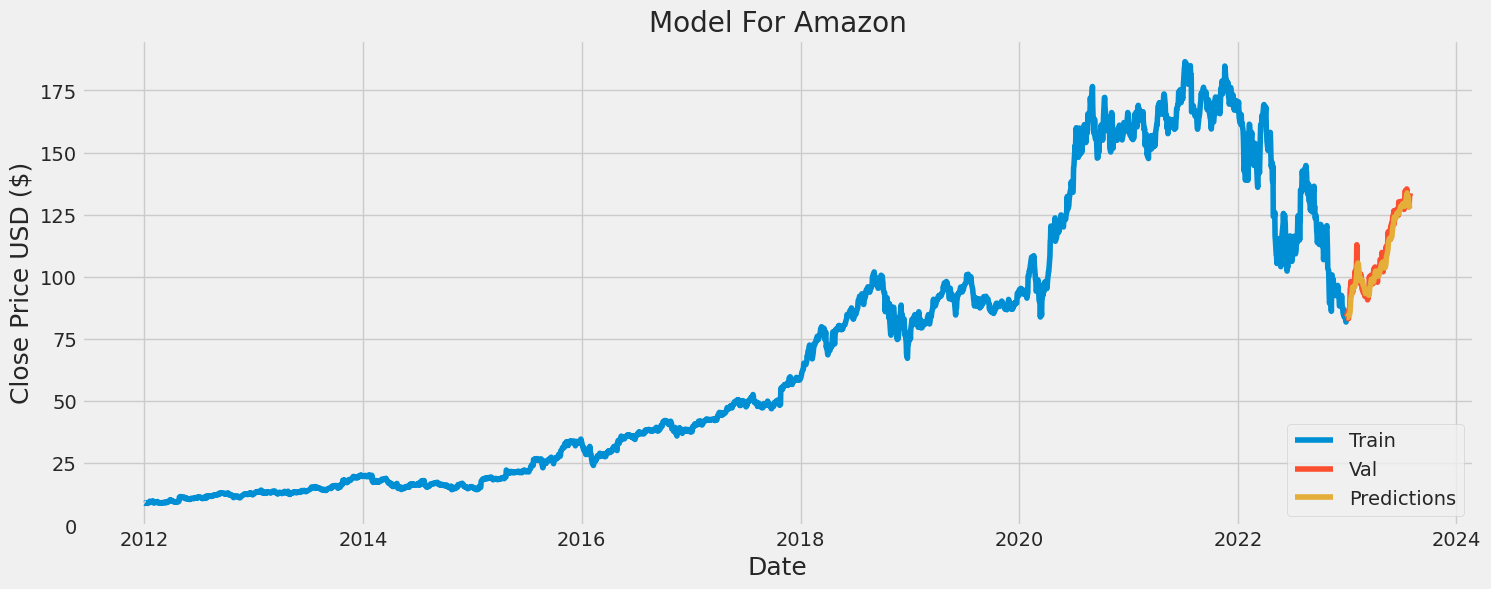

In [83]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model For Amazon')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [84]:
valid

,Close,Predictions
Date,,
2022-12-30,84.000000,83.627007
2023-01-03,85.820000,83.636719
2023-01-04,85.139999,84.138138
2023-01-05,83.120003,84.632584
2023-01-06,86.080002,84.620346
...,...,...
2023-07-25,129.130005,130.761932
2023-07-26,128.149994,129.706451
2023-07-27,128.250000,128.789108


In [85]:
# Get the stock quote
GOOGdf = pdr.get_data_yahoo('GOOG', start='2012-01-01', end=datetime.now())
# Show teh data
GOOGdf

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...
2023-07-25,121.879997,123.690002,121.529999,122.790001,122.790001,31820800
2023-07-26,130.360001,131.369995,128.710007,129.660004,129.660004,46216900
2023-07-27,131.800003,133.600006,129.179993,129.869995,129.869995,35931600


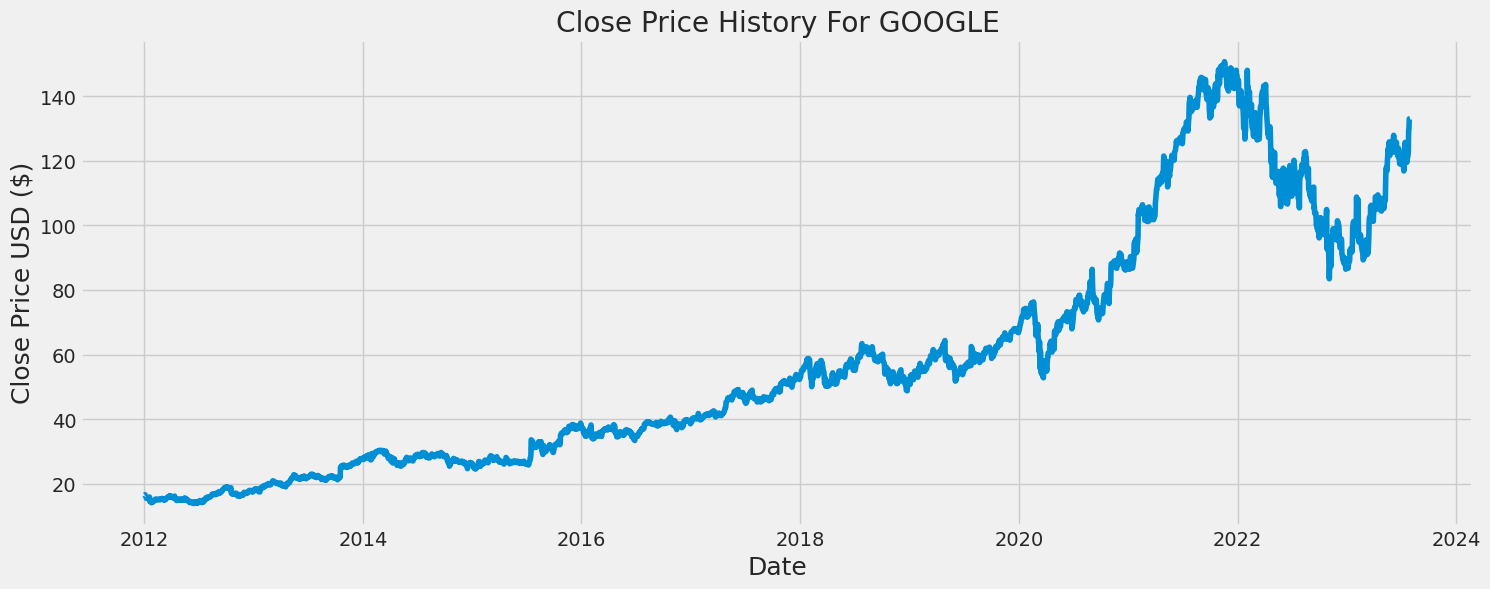

In [86]:
plt.figure(figsize=(16,6))
plt.title('Close Price History For GOOGLE')
plt.plot(GOOGdf['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [87]:
# Create a new dataframe with only the 'Close column
data = GOOGdf.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2767

In [88]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01936668],
       [0.01988927],
       [0.01820133],
       ...,
       [0.84765132],
       [0.87060706],
       [0.87133818]])

In [89]:
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.01936668, 0.01988927, 0.01820133, 0.01656439, 0.01154608,
       0.0116699 , 0.01218339, 0.01285346, 0.01200676, 0.01266045,
       0.01344889, 0.01466158, 0.0049054 , 0.00481982, 0.00398405,
       0.00190098, 0.00164788, 0.00381107, 0.00339409, 0.00383474,
       0.00396584, 0.00474516, 0.00678818, 0.0091116 , 0.00868915,
       0.00924998, 0.00954313, 0.00853256, 0.00967788, 0.00923359,
       0.00846883, 0.00864363, 0.00830131, 0.01000563, 0.00890219,
       0.00856898, 0.00925908, 0.00915165, 0.01080499, 0.01077951,
       0.01153516, 0.01132576, 0.01005116, 0.00835958, 0.00869461,
       0.00875653, 0.00750196, 0.00839417, 0.01069392, 0.01036799,
       0.01130392, 0.01201587, 0.01364372, 0.01355449, 0.01473623,
       0.01584149, 0.01521148, 0.01643874, 0.01601812, 0.01760955])]
[0.01627122404731983]

[array([0.01936668, 0.01988927, 0.01820133, 0.01656439, 0.01154608,
       0.0116699 , 0.01218339, 0.01285346, 0.01200676, 0.01266045,
       0.01344889, 0.01466158, 0.00

In [90]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2707/2707 [==============================] - 34s 10ms/step - loss: 0.0013


In [91]:
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 6ms/step


5.557684227050106

<ipython-input-92-110b43f76ccb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


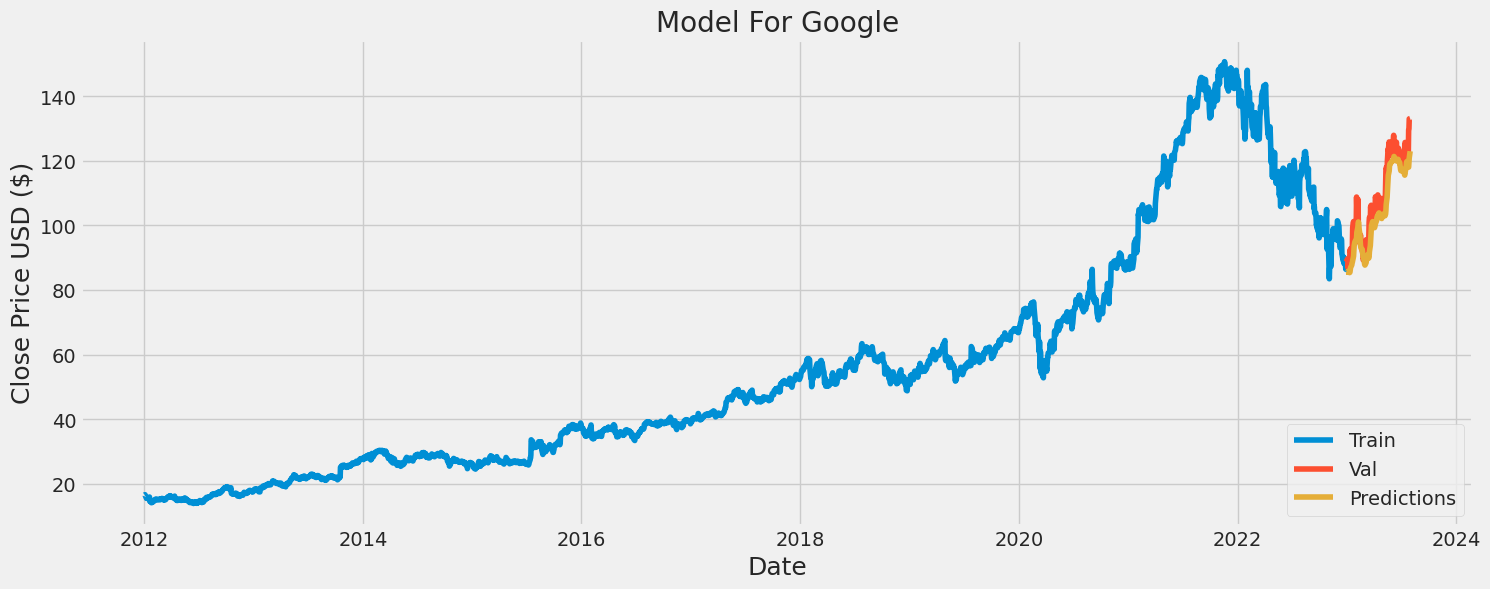

In [92]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model For Google')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [93]:
valid

,Close,Predictions
Date,,
2022-12-30,88.730003,85.563339
2023-01-03,89.699997,85.507469
2023-01-04,88.709999,85.701622
2023-01-05,86.769997,85.815819
2023-01-06,88.160004,85.563004
...,...,...
2023-07-25,122.790001,118.099312
2023-07-26,129.660004,118.045624
2023-07-27,129.869995,119.301651


In [94]:
# Get the stock quote
MSFTdf = pdr.get_data_yahoo('MSFT', start='2012-01-01', end=datetime.now())
# Show teh data
MSFTdf

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,26.549999,26.959999,26.389999,26.770000,21.366365,64731500
2012-01-04,26.820000,27.469999,26.780001,27.400000,21.869190,80516100
2012-01-05,27.379999,27.730000,27.290001,27.680000,22.092672,56081400
2012-01-06,27.530001,28.190001,27.530001,28.110001,22.435875,99455500
2012-01-09,28.049999,28.100000,27.719999,27.740000,22.140562,59706800
...,...,...,...,...,...,...
2023-07-25,347.109985,351.890015,345.070007,350.980011,350.980011,41637700
2023-07-26,341.440002,344.670013,333.109985,337.769989,337.769989,58383700
2023-07-27,340.480011,341.329987,329.049988,330.720001,330.720001,39635300


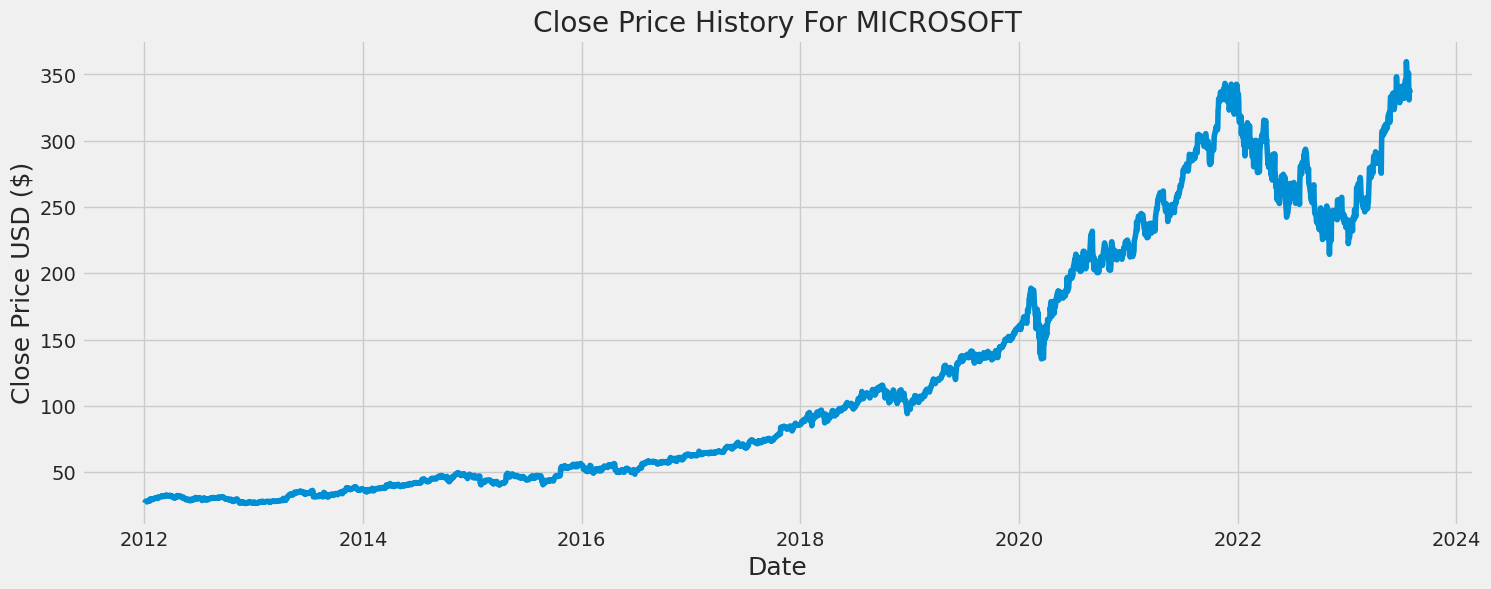

In [95]:
plt.figure(figsize=(16,6))
plt.title('Close Price History For MICROSOFT')
plt.plot(MSFTdf['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [96]:
# Create a new dataframe with only the 'Close column
data = MSFTdf.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2767

In [97]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00120077],
       [0.00309198],
       [0.00393252],
       ...,
       [0.91363476],
       [0.93659944],
       [0.92924478]])

In [98]:
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00120077, 0.00309198, 0.00393252, 0.00522334, 0.00411263,
       0.00441282, 0.00405259, 0.00489313, 0.00564361, 0.00567363,
       0.00558357, 0.00525336, 0.01002641, 0.01008645, 0.0089157 ,
       0.00957612, 0.00939601, 0.00858549, 0.00972622, 0.00948607,
       0.01056676, 0.01074688, 0.01161743, 0.01149736, 0.01194765,
       0.01287824, 0.01320845, 0.01239793, 0.01263809, 0.01164745,
       0.01104707, 0.01476945, 0.01464937, 0.01521974, 0.01470941,
       0.01500961, 0.01533981, 0.01494957, 0.01651057, 0.01612031,
       0.01777137, 0.01714097, 0.01630043, 0.01557997, 0.01642051,
       0.01693083, 0.01687079, 0.01702089, 0.0189121 , 0.0192123 ,
       0.01945244, 0.01870196, 0.0175012 , 0.01687079, 0.01663064,
       0.01690081, 0.01693083, 0.01867195, 0.01846182, 0.01747118])]
[0.017261041893918916]

[array([0.00120077, 0.00309198, 0.00393252, 0.00522334, 0.00411263,
       0.00441282, 0.00405259, 0.00489313, 0.00564361, 0.00567363,
       0.00558357, 0.00525336, 0.0

In [99]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2707/2707 [==============================] - 33s 10ms/step - loss: 9.7147e-04


In [100]:
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 7ms/step


8.493285749603427

<ipython-input-101-037cad99b9cb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


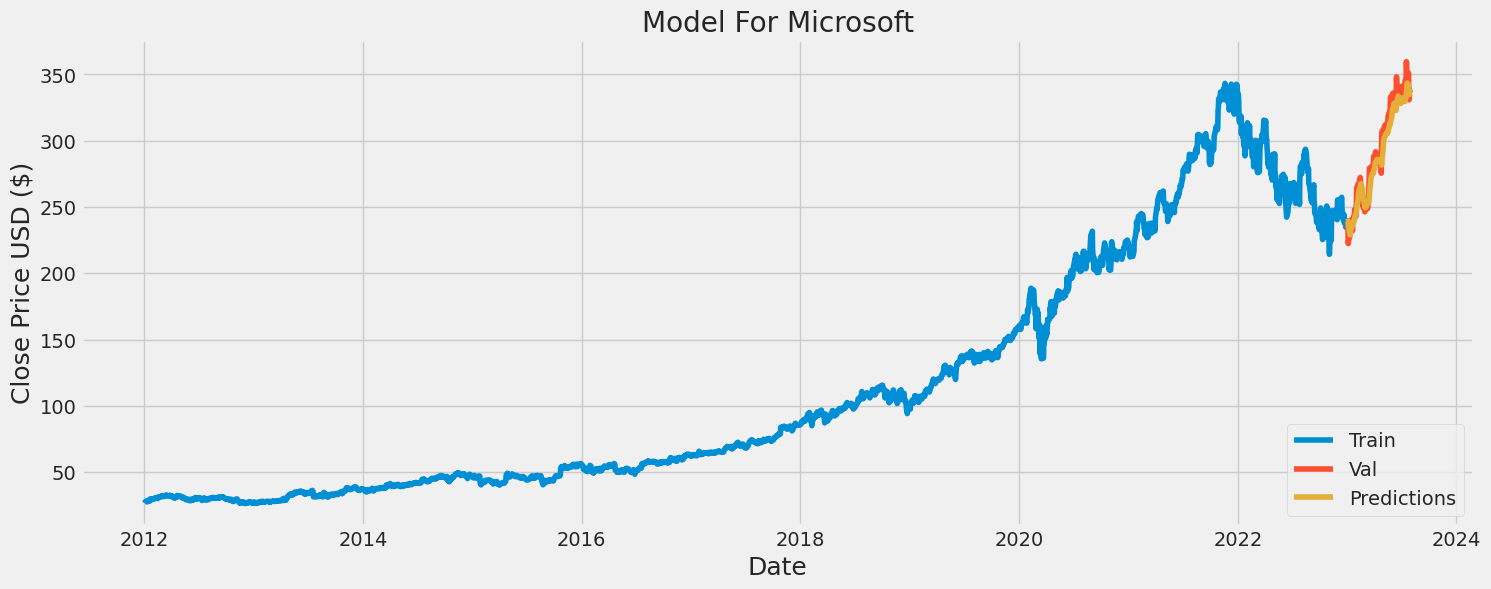

In [101]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model For Microsoft')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [102]:
valid

,Close,Predictions
Date,,
2022-12-30,239.820007,238.624039
2023-01-03,239.580002,238.956009
2023-01-04,229.100006,239.413330
2023-01-05,222.309998,237.959946
2023-01-06,224.929993,234.723862
...,...,...
2023-07-25,350.980011,341.235443
2023-07-26,337.769989,341.060486
2023-07-27,330.720001,338.880432


In [115]:
%%writefile app.py
import yfinance as yf
import streamlit as st

st.title("STOCK MARKET PREDICTION")

googleCheckbox= st.checkbox("Google Company")
appleCheckbox= st.checkbox("Apple Company")
amazonCheckbox= st.checkbox("Amazon Company")
microsoftCheckbox= st.checkbox("Microsoft Company")

if googleCheckbox:

   st.write("""
   **The Stock Closing Price For Google company**
   """)

   tickerSymbol = "GOOGL"
   tickerData = yf.Ticker(tickerSymbol)
   tickerdf= tickerData.history(period= "id", start= '2010-5-31', end= '2020-5-31')
   st.line_chart(tickerdf.Close)
   st.line_chart(tickerdf.Volume)


elif appleCheckbox:

   st.write("""
   **The Stock Closing Price For Apple company**
   """)

   tickerSymbol = "AAPL"
   tickerData = yf.Ticker(tickerSymbol)
   tickerdf= tickerData.history(period= "id", start= '2010-5-31', end= '2020-5-31')
   st.line_chart(tickerdf.Close)
   st.line_chart(tickerdf.Volume)

elif amazonCheckbox:

   st.write("""
   **The Stock Closing Price For Amazon company**
   """)

   tickerSymbol = "AMZN"
   tickerData = yf.Ticker(tickerSymbol)
   tickerdf= tickerData.history(period= "id", start= '2010-5-31', end= '2020-5-31')
   st.line_chart(tickerdf.Close)
   st.line_chart(tickerdf.Volume)

elif microsoftCheckbox:

   st.write("""
   **The Stock Closing Price For Microsoft company**
   """)

   tickerSymbol = "MSFT"
   tickerData = yf.Ticker(tickerSymbol)
   tickerdf= tickerData.history(period= "id", start= '2010-5-31', end= '2020-5-31')
   st.line_chart(tickerdf.Close)
   st.line_chart(tickerdf.Volume)

Overwriting app.py


In [117]:
!streamlit run /content/app.py & npx localtunnel --port 8501 & curl ipv4.icanhazip.com


34.139.200.57
[..................] / rollbackFailedOptional: verb npm-session c1f3fc150bd4eac


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.139.200.57:8501

npx: installed 22 in 3.641s
your url is: https://shaky-states-love.loca.lt
  Stopping...
